# Classification Predict Financial Inclusion in Africa

© Zindi

---

### Predict Overview: Card Ownership

The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

Some of the analysis to be done are:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the with bank accounts
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.


## Importing Packages

In [81]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px



# Libraries for data preparation and model building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import chi2, SelectKBest
import dabl
from dabl import plot
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF
import xgboost as xgb
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.linear_model import HuberRegressor, TheilSenRegressor
from sklearn.model_selection import GridSearchCV
import ptitprince as pt





# enhanced stats functions
from scipy import stats
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42
import warnings
warnings.filterwarnings('ignore')

## Loading The Data

In [82]:
file = r"C:\Users\Dell\Documents\Data Science\Zindi\Account Pred\financial-inclusion-in-africa\Acct\acct_train.csv"
df = pd.read_csv(file)

df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## Exploratory Data Analysis (EDA)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0


In [85]:
df.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [86]:
df.duplicated().sum()

0

In [87]:
df.shape

(23524, 13)

People with account 3312
People without account 20212


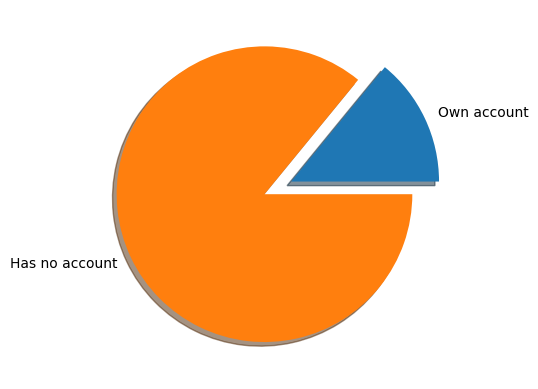

In [88]:
own = len(df['bank_account'][df.bank_account=='Yes'])
dont = len(df['bank_account'][df.bank_account=='No'])
arr = np.array([own, dont])
labels = ['Own account', 'Has no account']

print('People with account {}'.format(own))
print('People without account {}'.format(dont))

plt.pie(arr, labels=labels, explode=[0.2,.0], shadow=True)
plt.show()

We are ddealing with an imbalance data

<Axes: xlabel='age_of_respondent', ylabel='Density'>

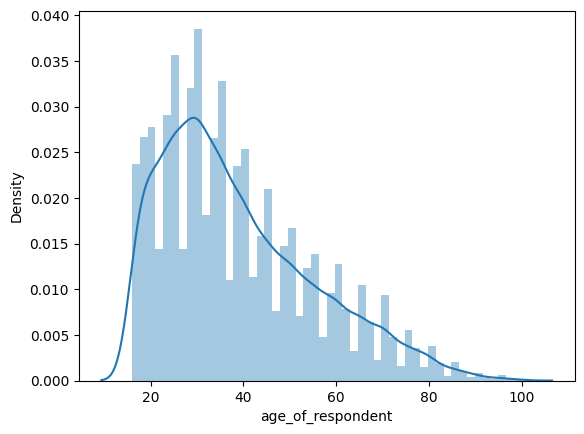

In [89]:
sns.distplot(df['age_of_respondent'])

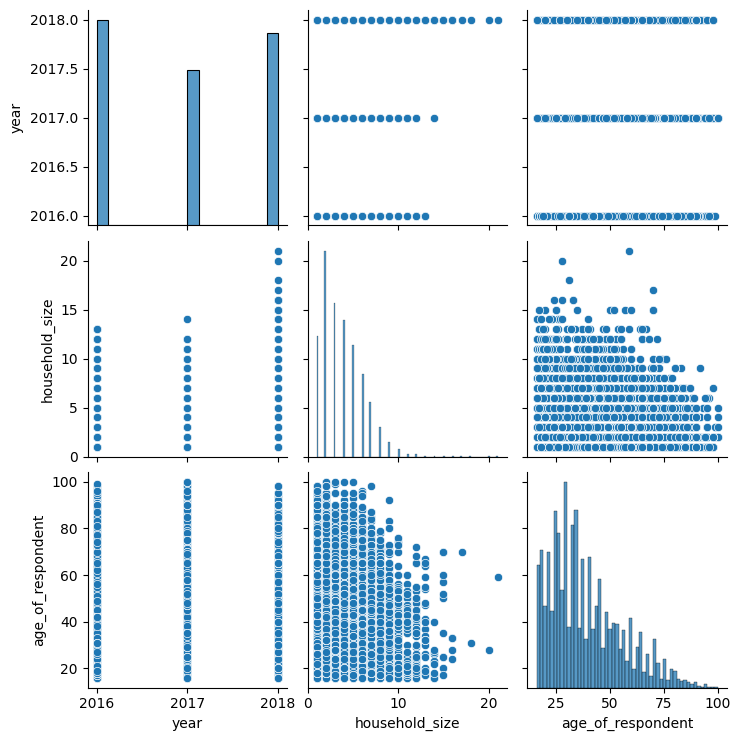

In [90]:
sns.pairplot(df)

In [91]:
df.var()

year                   0.718037
household_size         4.962259
age_of_respondent    272.929198
dtype: float64

<Axes: >

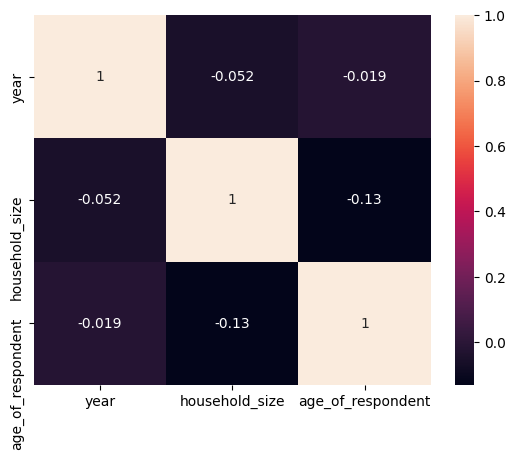

In [92]:
# plot relevant feature interactions
sns.heatmap(df.corr(), annot=True)

In [93]:
# evaluate correlation
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix.T)

                       year  household_size  age_of_respondent
year               1.000000       -0.052264          -0.019330
household_size    -0.052264        1.000000          -0.129729
age_of_respondent -0.019330       -0.129729           1.000000


In [94]:
df.year.unique()

array([2018, 2016, 2017], dtype=int64)

In [95]:
df = df[['uniqueid', 'bank_account', 'location_type', 'cellphone_access', 'household_size', 'age_of_respondent', 'country',
             'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']]

# Handle missing values if any

# Step 3: Feature Engineering
# Convert categorical columns to numerical using label encoding
label_encoder = LabelEncoder()
categorical_cols = ['bank_account', 'location_type',
'cellphone_access',
'gender_of_respondent']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [96]:
df.head()

,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,country,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,uniqueid_1,1,0,1,3,24,Kenya,0,Spouse,Married/Living together,Secondary education,Self employed
1,uniqueid_2,0,0,0,5,70,Kenya,0,Head of Household,Widowed,No formal education,Government Dependent
2,uniqueid_3,1,1,1,5,26,Kenya,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,uniqueid_4,0,0,1,5,34,Kenya,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,uniqueid_5,0,1,0,8,26,Kenya,1,Child,Single/Never Married,Primary education,Informally employed


In [97]:
encod = ['relationship_with_head', 'country', 
                    'marital_status', 'education_level', 'job_type']


df = pd.get_dummies(df, prefix_sep="_", columns=encod, drop_first=True)

In [98]:
df.head()

,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,uniqueid_1,1,0,1,3,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,uniqueid_2,0,0,0,5,70,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,uniqueid_3,1,1,1,5,26,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,uniqueid_4,0,0,1,5,34,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,uniqueid_5,0,1,0,8,26,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [99]:
df.shape

(23524, 33)

<Axes: >

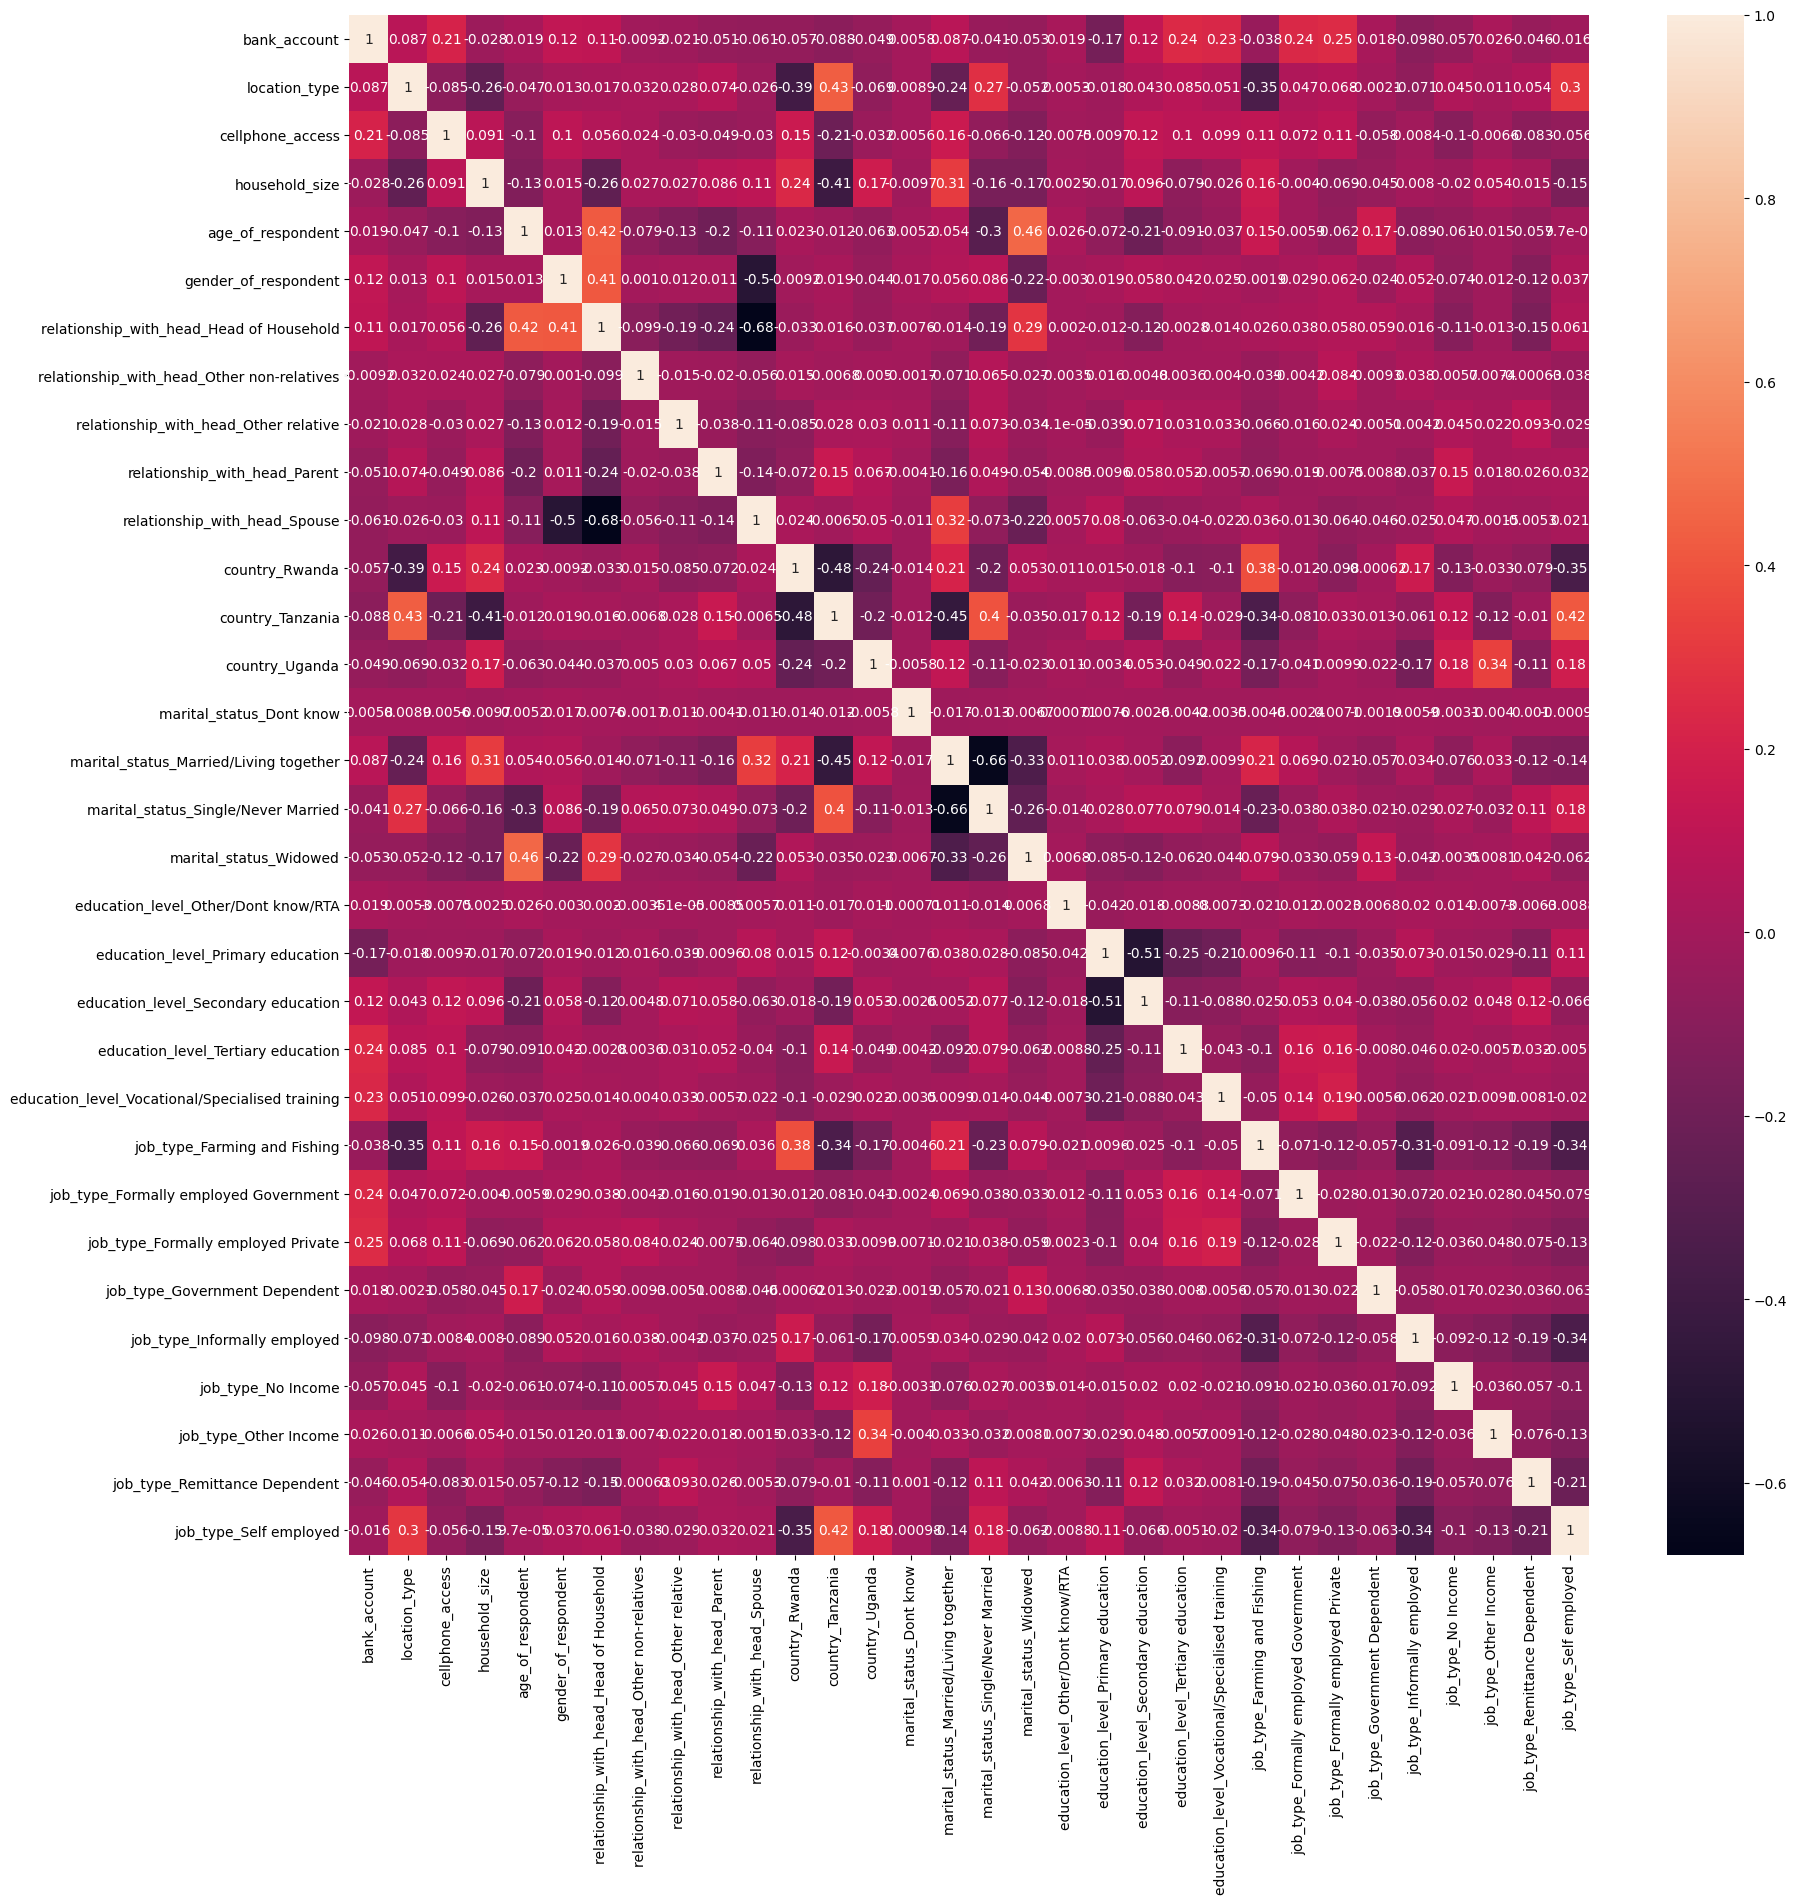

In [100]:
# plot relevant feature interactions
plt.figure(figsize=[20,20])
sns.heatmap(df.corr(), annot=True)

In [101]:
# evaluate correlation
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix.T)

                                                 bank_account  location_type  \
bank_account                                         1.000000       0.087288   
location_type                                        0.087288       1.000000   
cellphone_access                                     0.209669      -0.085238   
household_size                                      -0.028326      -0.257284   
age_of_respondent                                    0.019429      -0.047373   
gender_of_respondent                                 0.117234       0.012924   
relationship_with_head_Head of Household             0.114506       0.017202   
relationship_with_head_Other non-relatives          -0.009218       0.031979   
relationship_with_head_Other relative               -0.020639       0.028483   
relationship_with_head_Parent                       -0.051197       0.074399   
relationship_with_head_Spouse                       -0.060884      -0.026213   
country_Rwanda                          

In [102]:
ab = abs(correlation_matrix['bank_account'])
rel = ab[ab > .05]
ys = [index for index, value in rel.iteritems()]
ys.remove('bank_account')
print(ys)
print(len(ys))

['location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head_Head of Household', 'relationship_with_head_Parent', 'relationship_with_head_Spouse', 'country_Rwanda', 'country_Tanzania', 'marital_status_Married/Living together', 'marital_status_Widowed', 'education_level_Primary education', 'education_level_Secondary education', 'education_level_Tertiary education', 'education_level_Vocational/Specialised training', 'job_type_Formally employed Government', 'job_type_Formally employed Private', 'job_type_Informally employed', 'job_type_No Income']
18


In [103]:
df = df[['uniqueid', 'bank_account', 'location_type', 'cellphone_access','gender_of_respondent', 'relationship_with_head_Head of Household', 
         'relationship_with_head_Parent', 'relationship_with_head_Spouse', 'country_Rwanda', 'country_Tanzania', 
         'marital_status_Married/Living together', 'marital_status_Widowed', 'education_level_Primary education', 
         'education_level_Secondary education', 'education_level_Tertiary education', 'education_level_Vocational/Specialised training',
         'job_type_Formally employed Government', 'job_type_Formally employed Private', 'job_type_Informally employed', 'job_type_No Income']]

In [104]:
df = df.drop(columns=['uniqueid'], axis=1)

In [105]:
df.head()

,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head_Head of Household,relationship_with_head_Parent,relationship_with_head_Spouse,country_Rwanda,country_Tanzania,marital_status_Married/Living together,marital_status_Widowed,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Informally employed,job_type_No Income
0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [106]:
dfx = df.drop('bank_account', axis=1).values
dfy = df['bank_account'].values

In [107]:
dfx.shape

(23524, 18)

## Train Test Split

In [108]:
X2_train, X2_test, y2_train, y2_test = train_test_split(dfx, dfy, random_state=42, stratify=dfy, test_size=0.2)

In [109]:
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(18819, 18)
(18819,)
(4705, 18)
(4705,)


## Model Development

In [110]:
# logistics Regression
lr = LogisticRegression()

# Decision Tree
dt = DecisionTreeClassifier()

# Random forest
rd = RandomForestClassifier()

# Support vector
sv = SVC()

# Gauss naive bayse
gnb = GaussianNB()

# Gradient boosting
grd = GradientBoostingClassifier()

# MLP
mlp = MLPClassifier()

# vc = VotingClassifier(estimators=classifiers=2)   

# Knearest neighbour
kn = KNeighborsClassifier()

In [112]:
classifiers = [lr, dt, rd, sv, gnb, grd, mlp, kn]

In [113]:
# Set seed for reproducibility
SEED=1


# Instantiate lr
lr = LogisticRegression(random_state=SEED)


# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=27)


# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=.13, random_state=SEED)

rd = RandomForestClassifier()
sv = SVC()
gnb = GaussianNB()
grd = GradientBoostingClassifier()
mlp = MLPClassifier()
# vc = VotingClassifier(estimators=classifiers)     

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt), ('rd', rd), ('sv', sv), 
               ('gnb', gnb), ('grd', grd), ('mlp', mlp)]



# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
  
    # Fit clf to the training set
    clf.fit(X2_train, y2_train)    
  
    # Predict y_pred
    y_pred = clf.predict(X2_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y2_test, y_pred)
  
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))
    
    # Get error rate
    print("Error rate of the classifier: ", 1 - accuracy)


Logistic Regression : 0.886
Error rate of the classifier:  0.11434643995749205
K Nearest Neighbours : 0.886
Error rate of the classifier:  0.11434643995749205
Classification Tree : 0.859
Error rate of the classifier:  0.140701381509033
rd : 0.884
Error rate of the classifier:  0.11583421891604673
sv : 0.891
Error rate of the classifier:  0.10903294367693939
gnb : 0.871
Error rate of the classifier:  0.128586609989373
grd : 0.892
Error rate of the classifier:  0.10818278427205097
mlp : 0.891
Error rate of the classifier:  0.1094580233793836


In [114]:
# Instantiate 
gd = GradientBoostingClassifier()     


# Fit vc to the training set
gd.fit(X2_train, y2_train)   


# Evaluate the test set predictions
y2_pred2 = gd.predict(X2_test)

grad = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred2})


In [115]:
grad.sample(10)

,Actual,Predicted
120,1,0
296,0,0
1007,0,0
4000,1,0
1851,0,0
2663,0,1
2624,0,0
160,0,0
327,1,1
1699,0,0


In [116]:
# Calculate accuracy score
accuracy22 = accuracy_score(y2_test, y2_pred2)
print('Gradient Classifier:', (accuracy22))
print("Error rate of the classifier: ", 1 - accuracy22)

Gradient Classifier: 0.891817215727949
Error rate of the classifier:  0.10818278427205097


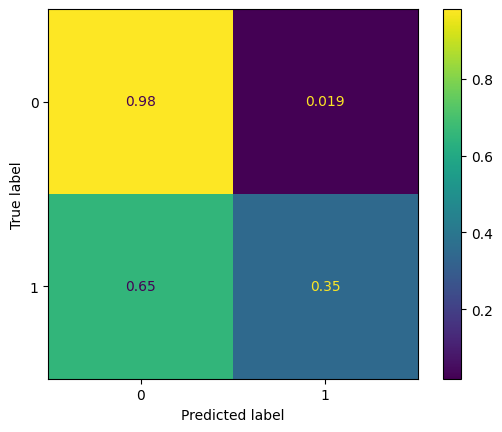

In [117]:
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(grd,X2_test, y2_test,normalize='true')

In [120]:
Model_Performance = { 
    
                      'Gradient boosting':
                    
                        {"RMSE": np.sqrt(mse(y2_test,y2_pred2)),
                        "MSE" : (mse(y2_test,y2_pred2)),
                        "MAE" : (mae(y2_test,y2_pred2)),
                        "R2_square vector" : (r2_score(y2_test,y2_pred2)),}
                        
                    }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

,Gradient boosting
MAE,0.108183
MSE,0.108183
R2_square vector,0.105221
RMSE,0.328912


In [121]:
px.bar(Model_Performance, y =Model_Performance['Gradient boosting'],
       color = Model_Performance.index, width =700, height=400)

In [122]:
df2 = pd.read_csv(r"C:\Users\Dell\Documents\Data Science\Zindi\Account Pred\financial-inclusion-in-africa\Acct\acct_test.csv")

df2.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [123]:
df2.country.unique()


array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [124]:
uniqueid = df2['uniqueid']
country = df2['country']

In [125]:
df2 = df2[['uniqueid', 'location_type', 'cellphone_access', 'household_size', 'age_of_respondent', 'country',
             'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']]


# Handle missing values if any

# Step 3: Feature Engineering
# Convert categorical columns to numerical using label encoding
label_encoder = LabelEncoder()
categorical_cols =  ['location_type',
'cellphone_access',
'gender_of_respondent']

for col in categorical_cols:
    df2[col] = label_encoder.fit_transform(df2[col])
    
    
encod =  ['relationship_with_head', 'country', 
                    'marital_status', 'education_level', 'job_type']
    
df2 = pd.get_dummies(df2, prefix_sep='_', columns=encod, drop_first=True)

In [126]:
df2.head()

,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,uniqueid_6056,1,1,3,30,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,uniqueid_6060,1,1,7,51,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,uniqueid_6065,0,0,3,77,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,uniqueid_6072,0,0,6,39,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,uniqueid_6073,1,0,3,16,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [127]:
df2.columns

Index(['uniqueid', 'location_type', 'cellphone_access', 'household_size',
       'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'marital_status_Dont know', 'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Farming and Fishing', 'job_type_Formally employed Government',
       'job_type_Formally employed Private', 'job_type_Government Dependent',
       'job_type_Informally employed', '

In [128]:
df2 = df2[['uniqueid', 'location_type', 'cellphone_access','gender_of_respondent', 'relationship_with_head_Head of Household', 
         'relationship_with_head_Parent', 'relationship_with_head_Spouse', 'country_Rwanda', 'country_Tanzania', 
         'marital_status_Married/Living together', 'marital_status_Widowed', 'education_level_Primary education', 
         'education_level_Secondary education', 'education_level_Tertiary education', 'education_level_Vocational/Specialised training',
         'job_type_Formally employed Government', 'job_type_Formally employed Private', 'job_type_Informally employed', 'job_type_No Income']]

In [129]:
df2 = df2.drop('uniqueid', axis=1)
df2.head()

,location_type,cellphone_access,gender_of_respondent,relationship_with_head_Head of Household,relationship_with_head_Parent,relationship_with_head_Spouse,country_Rwanda,country_Tanzania,marital_status_Married/Living together,marital_status_Widowed,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Informally employed,job_type_No Income
0,1,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [130]:
# Fit vc to the training set
svc.fit(X2_train, y2_train)   

# Evaluate the test set predictions
y2_pred3 = svc.predict(X2_test)


df2['bank_account'] = svc.predict(df2)

In [131]:
df2['country'] = country
df2['uniqueid'] = uniqueid  
 

In [132]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": df2["uniqueid"] + " x " + df2["country"],
                           "bank_account": df2.bank_account})

In [133]:
# save_data = df2[['uniqueid', 'country', 'bank_account']]
submission.to_csv(r'C:\Users\Dell\Documents\Data Science\Zindi\Account Pred\Account_owners2.csv', index=False)
submission.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
